Purpose:

Sanity check that intensity effects are present

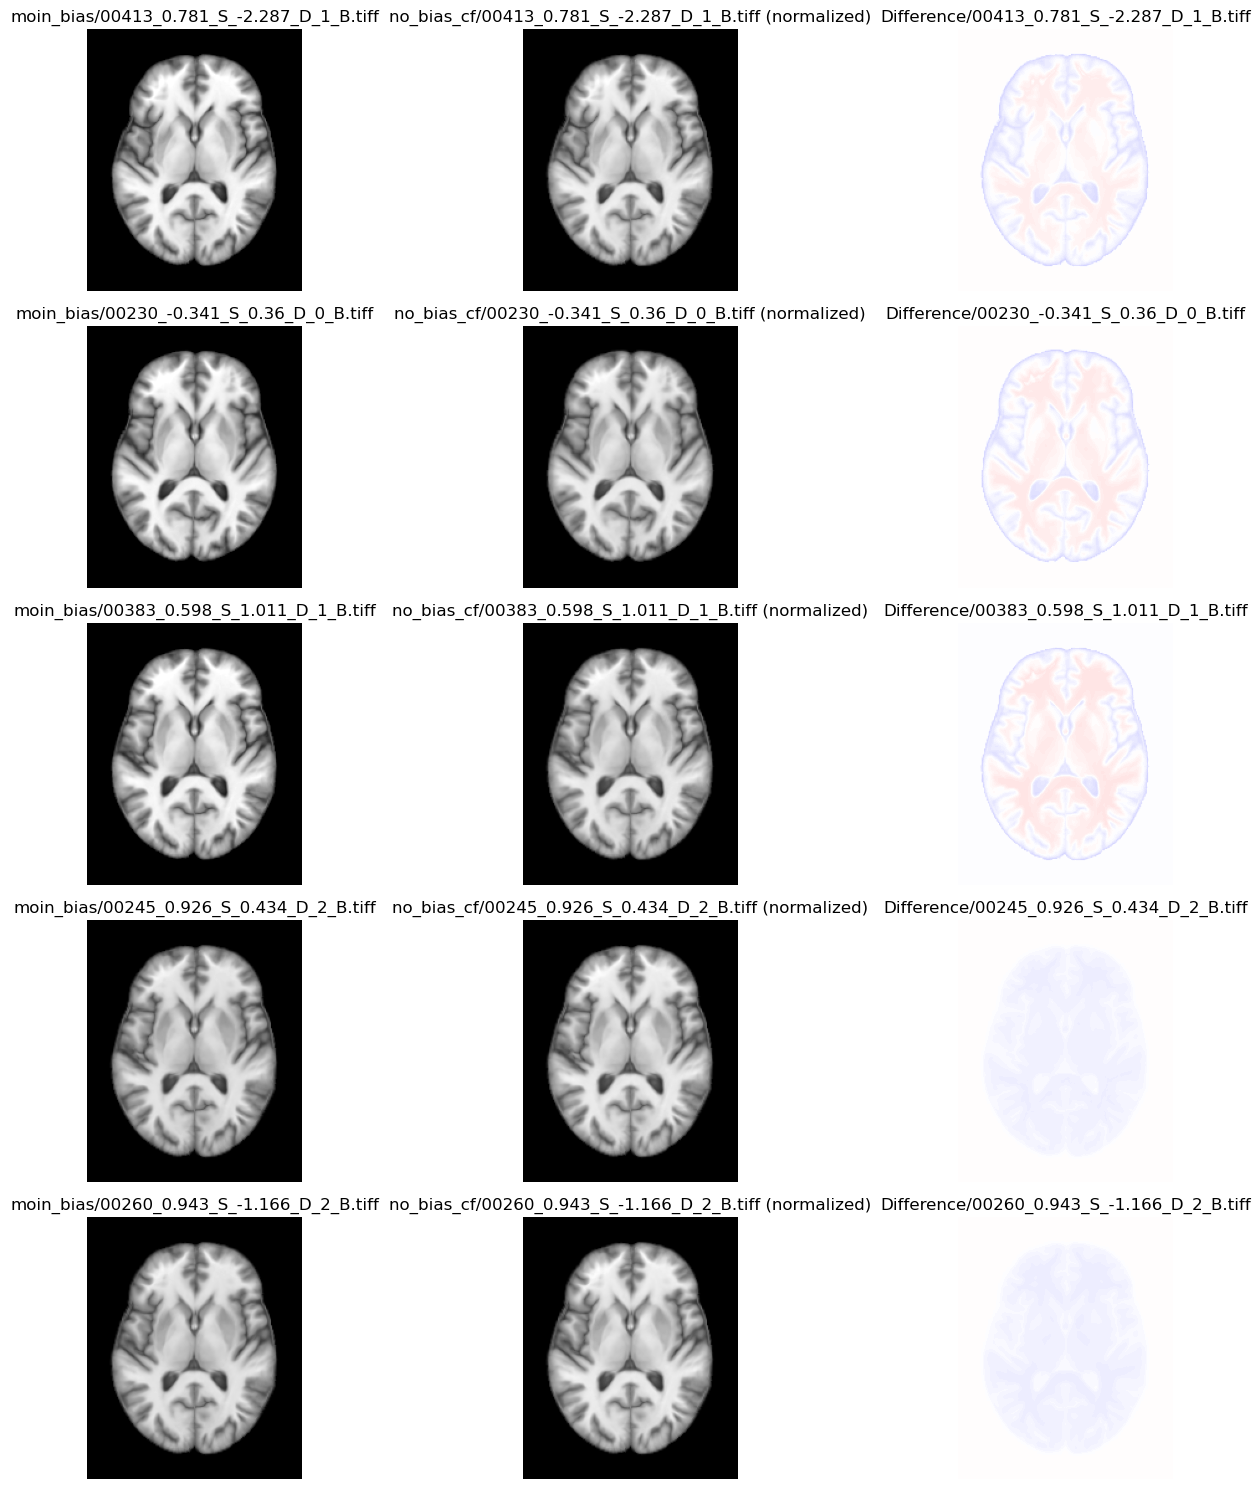

In [10]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            try:
                img = tiff.imread(img_path)
                if img is not None:
                    images[filename] = img
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
    return images

# Function to normalize an image to the range [0, 1]
def normalize_image(img):
    img_min = img.min()
    img_max = img.max()
    if img_max > img_min:
        return (img - img_min) / (img_max - img_min)
    else:
        return img

# Load images from both folders
folder1 = "../moin_bias/test"
folder2 = "../mor_bias/test"

images1 = load_images_from_folder(folder1)
images2 = load_images_from_folder(folder2)
# Check if images are loaded correctly
if not images1 or not images2:
    print("One or both directories are empty or do not contain valid images.")
else:
    # Normalize images from the second folder
    images2_normalized = {filename: normalize_image(img) for filename, img in images2.items()}
    
    # Calculate differences and store them
    differences = {}
    for filename in images1:
        if filename in images2_normalized:
            diff = images1[filename] - images2_normalized[filename]
            differences[filename] = diff

    # Visualize the differences
    def visualize_differences(images1, images2, differences, num_images=5):
        plt.figure(figsize=(15, 15))
        i = 0
        for filename in differences:
            if i >= num_images:
                break
            img1 = images1[filename]
            diff = differences[filename]
            
            # Display moin_bias image
            plt.subplot(num_images, 3, 3 * i + 1)
            plt.imshow(img1, cmap='gray', clim=(0, 1))
            plt.title(f"moin_bias/{filename}")
            plt.axis('off')
            
            # Display normalized no_bias_cf image
            plt.subplot(num_images, 3, 3 * i + 2)
            plt.imshow(images2_normalized[filename], cmap='gray', clim=(0, 1))
            plt.title(f"no_bias_cf/{filename} (normalized)")
            plt.axis('off')
            
            # Display difference image with limits set for visualization
            plt.subplot(num_images, 3, 3 * i + 3)
            plt.imshow(diff, cmap='seismic', clim=(-1, 1))
            plt.title(f"Difference/{filename}")
            plt.axis('off')
            
            i += 1

        plt.tight_layout()
        plt.show()

    # Visualize the first few differences
    visualize_differences(images1, images2_normalized, differences, num_images=5)


In [ ]:
images1['00000_-1.331_S_-0.328_D_0_B.tiff'].max()

In [ ]:
images2_normalized['00000_-1.331_S_-0.328_D_0_B.tiff'].max()